In [1]:
import os
import numpy as np
from PIL import Image
import sqlite3 as lite
import matplotlib.pyplot as plt

In [2]:
data_dir = './Images 16'
img_dir = os.path.join(data_dir)
out_dir = os.path.join(data_dir, 'cropped')
spect_dir = os.path.join(data_dir, 'spectra')

In [3]:
try:
    os.mkdir(out_dir)
    os.mkdir(spect_dir)
except OSError:
    pass

In [4]:
print(os.path.join(data_dir, 'samples.db'))

./Images 16/samples.db


In [5]:
# Connect to DB
to_execute = 'SELECT * FROM samples;'

con = lite.connect(os.path.join(data_dir, 'samples.db'))
cur = con.cursor()
cur.execute(to_execute)

con.commit()
results = cur.fetchall()
con.close()

In [6]:
results = results[171:]

In [7]:
white = np.loadtxt('white_1.csv')

bbox = [800, 1000, 3000, 1300]
for r in results:
    print('Cropping image: {} from {}'.format(r[-2].lower(), r[-1].lower()))
    # Get the image
    im = Image.open(os.path.join(img_dir, r[-2]))

    # Crop the image with the interesting part
    region = im.crop(bbox)

    # Save the region
    region.save(os.path.join(out_dir, '{}.jpg'.format(r[-1].lower())))
    regarr = np.array(region)

    # Compute spectrum from the image
    spectrum = regarr.sum(axis=2).mean(axis=0)
    spectrum = np.log(1./(spectrum/white))
    spectrum = (spectrum-spectrum.mean())/spectrum.std()
    np.savetxt(os.path.join(spect_dir, '{}.csv'.format(r[-1].lower())),
               spectrum, delimiter='\t')

Cropping image: image_1470874911.jpg from stark_good_t1
Cropping image: image_1470874929.jpg from stark_good_t2
Cropping image: image_1470874947.jpg from stark_good_t3
Cropping image: image_1470874975.jpg from stark_good_t4
Cropping image: image_1470874992.jpg from stark_good_t5
Cropping image: image_1470875011.jpg from stark_good_t6
Cropping image: image_1470875029.jpg from stark_good_t7
Cropping image: image_1470875056.jpg from stark_good_t8
Cropping image: image_1470875077.jpg from stark_good_t9
Cropping image: image_1470875096.jpg from stark_good_t10
Cropping image: image_1470875124.jpg from stark_good_t11
Cropping image: image_1470875143.jpg from stark_good_t12
Cropping image: image_1470875170.jpg from stark_good_t13
Cropping image: image_1470875188.jpg from stark_good_t14
Cropping image: image_1470875207.jpg from stark_good_t15
Cropping image: image_1470875229.jpg from stark_good_t16
Cropping image: image_1470875249.jpg from stark_good_t16
Cropping image: image_1470875273.jpg fro

Cropping image: image_1470875353.jpg from stark_bad_badside_t30
Cropping image: image_1470875381.jpg from stark_bad_badside_t31
Cropping image: image_1470875403.jpg from stark_bad_badside_t31
Cropping image: image_1470875422.jpg from stark_bad_badside_t33
Cropping image: image_1470875440.jpg from stark_bad_badside_t34
Cropping image: image_1470875462.jpg from stark_bad_badside_t34
Cropping image: image_1470875499.jpg from stark_bad_badside_t35
Cropping image: image_1470875515.jpg from stark_bad_badside_t35
Cropping image: image_1470875531.jpg from stark_bad_badside_t36
Cropping image: image_1470875546.jpg from stark_bad_badside_t37
Cropping image: image_1470875561.jpg from stark_bad_badside_t38
Cropping image: image_1470875576.jpg from stark_bad_badside_t39
Cropping image: image_1470875591.jpg from stark_bad_badside_t39
Cropping image: image_1470875606.jpg from stark_bad_badside_t39
Cropping image: image_1470875622.jpg from stark_bad_badside_t39
Cropping image: image_1470875655.jpg fro

Cropping image: image_1470879650.jpg from golden_bad_goodside_t45
Cropping image: image_1470879685.jpg from golden_bad_goodside_t46
Cropping image: image_1470879704.jpg from golden_bad_goodside_t47
Cropping image: image_1470879733.jpg from golden_bad_goodside_t48
Cropping image: image_1470879762.jpg from golden_bad_goodside_t49
Cropping image: image_1470879786.jpg from golden_bad_goodside_t50
Cropping image: image_1470879960.jpg from golden_bad_badside_t1
Cropping image: image_1470879996.jpg from golden_bad_badside_t2
Cropping image: image_1470880016.jpg from golden_bad_badside_t3
Cropping image: image_1470880037.jpg from golden_bad_badside_t5
Cropping image: image_1470880061.jpg from golden_bad_badside_t6
Cropping image: image_1470880082.jpg from golden_bad_badside_t7
Cropping image: image_1470880103.jpg from golden_bad_badside_t8
Cropping image: image_1470880129.jpg from golden_bad_badside_t9
Cropping image: image_1470880148.jpg from golden_bad_badside_t10
Cropping image: image_14708

In [8]:
im = Image.open(os.path.join(img_dir, results[0][-2]))
imarr = np.array(im)

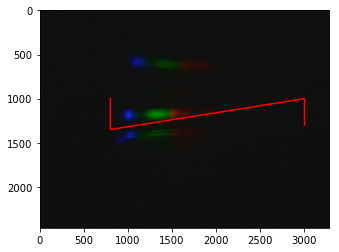

In [9]:
bbox_x = [800, 800, 3000, 3000]
bbox_y = [1000, 1350, 1000, 1300]
plt.imshow(imarr)
plt.plot(bbox_x, bbox_y, 'r-')
plt.show()

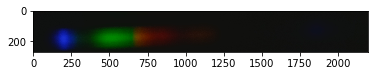

In [10]:
bbox = [800, 1000, 3000, 1270]
region = im.crop(bbox)
regarr = np.array(region)
plt.imshow(regarr)
plt.show()

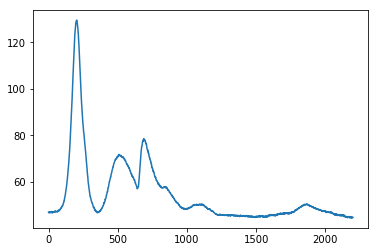

In [11]:
spectrum = regarr.sum(axis=2).mean(axis=0)
plt.plot(spectrum)
plt.show()